<h2>ID: <u>100675765</u></h2>
<h3 style = "font-size: 23px">Course Name: <u>Data Mining and Foundation of AI (6CC555)</u> </h3>


<span style = "font-size:18px">For this project we will be exploring publicly available data from [kaggle.com] https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia .
The dataset contains chest X-ray images concerning **Pneumonia** and is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

<span style = "font-size:18px">The chest X-ray images were collected from pediatric patients (ages 1–5) at Guangzhou Women and Children’s Medical Center as part of routine clinical care. Low-quality or unreadable scans were excluded through quality control. Two expert physicians graded the diagnoses, and a third expert reviewed the evaluation set to ensure accuracy for training the AI system.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

In [39]:
img1=cv2.imread('chest_xray/train/PNEUMONIA/person10_bacteria_43.jpeg')
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img1.shape

(650, 1028, 3)

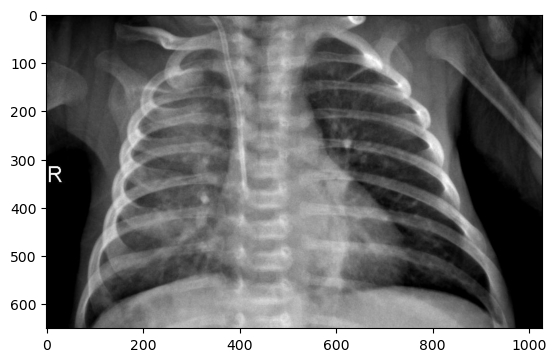

In [41]:
plt.imshow(img1)
plt.show()

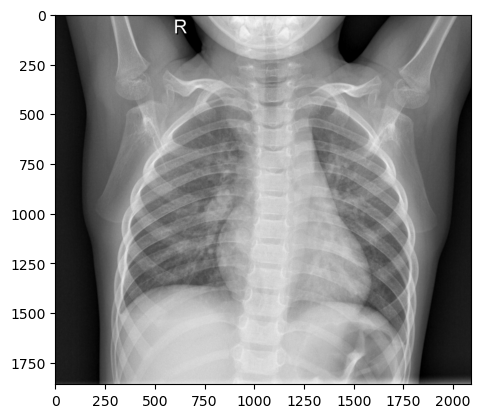

In [43]:
img2=cv2.imread('chest_xray/train/NORMAL/IM-0115-0001.jpeg')
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.show()

<span style = "font-size:18px"><h2>Preparing the Data for the model</h2>

<span style = "font-size:18px">There is too much data to read all at once in memory. I will use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

<span style = "font-size:18px"><h2>Image Manipulation/ Generators with Augmentation</h2>

<span style = "font-size:18px">I manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that the data set doesn't have. I use use the ImageDataGenerator to do this automatically.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_dir = "./chest_xray/train/"
val_dir = "./chest_xray/val/"
test_dir = "./chest_xray/test/"

img_size = (150,150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Rotate the image 30 degrees
    width_shift_range=0.1,  # Shift the image width by a max of 10%
    height_shift_range=0.1,  # Shift the image height by a max of 10%
    shear_range=0.2,  # Shear (cutting away part of the image)
    zoom_range=0.2,  # Zoom in by 20% max
    horizontal_flip=True,  # Allow horizontal flipping
    fill_mode='nearest'  # Fill missing pixels after transformation
)

#  apply only rescale to validation and test sets
val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

<span style = "font-size:18px">Ιnstances of img1 and img2 when random transorm is applied

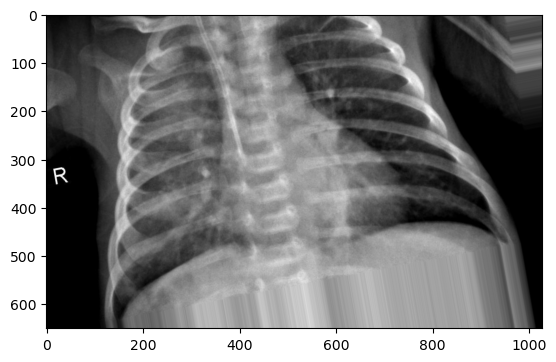

In [49]:
plt.imshow(train_datagen.random_transform(img1))
plt.show()

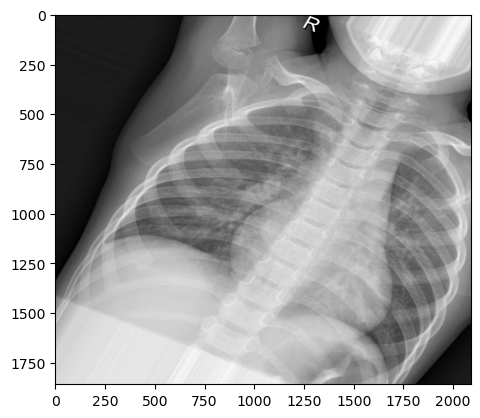

In [70]:
plt.imshow(train_datagen.random_transform(img2))
plt.show()

<span style = "font-size:18px">Create Data Generators for Training, Validation and Testing

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False #ensures that the model's performance is evaluated in the same order and in a reproducible manner
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


<span style = "font-size:18px"><h2>Creating the model</h2>

<span style = "font-size:18px"><h2>Model 1</h2>

In [9]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from tensorflow.keras.optimizers import Adam

<span style = "font-size:18px">The model_1 architecture is a deep convolutional neural network built using Keras’ Sequential API for binary image classification. It takes input images of shape (150, 150, 3) and progressively extracts features through four convolutional layers with increasing filter sizes (32, 64, 128, and 256), each followed by a max pooling layer to reduce spatial dimensions. After flattening the feature maps, the model includes two fully connected (Dense) layers with 512 and 256 neurons respectively, both using ReLU activation and incorporating dropout regularization (0.5) to prevent overfitting. The final output layer uses a sigmoid activation function to produce a probability for binary classification. The model is compiled with binary cross-entropy loss and the Adam optimizer, and it tracks accuracy during training.

In [108]:
input_shape=(150,150,3)

model_1 = Sequential([
    Input(input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])   

model_1.summary()

2025-04-09 16:59:39.421607: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-09 16:59:39.422096: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-09 16:59:39.422106: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-09 16:59:39.422523: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-09 16:59:39.423258: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,943,041 (26.49 MB)

 Trainable params: 6,943,041 (26.49 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
# Show the different classes
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
# Dynamic step calculation
steps_per_epoch = len(train_generator)
validation_steps = len(val_generator)

# Fit the model with train and validation generator for 20 epochs
result_1 = model_1.fit(train_generator,
                     epochs=20,
                     steps_per_epoch=steps_per_epoch, 
                     validation_data=val_generator,
                     validation_steps=validation_steps) 

Epoch 1/20


2025-04-09 17:04:46.601564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-04-09 17:04:46.609182: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 262ms/step - accuracy: 0.7479 - loss: 0.5875 - val_accuracy: 0.8750 - val_loss: 0.5446
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 252ms/step - accuracy: 0.8015 - loss: 0.4134 - val_accuracy: 0.7500 - val_loss: 0.5624
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 250ms/step - accuracy: 0.8672 - loss: 0.3158 - val_accuracy: 0.6250 - val_loss: 1.0960
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 249ms/step - accuracy: 0.8764 - loss: 0.2970 - val_accuracy: 0.8125 - val_loss: 0.5830
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 249ms/step - accuracy: 0.9069 - loss: 0.2319 - val_accuracy: 0.8125 - val_loss: 0.5505
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 251ms/step - accuracy: 0.9107 - loss: 0.2177 - val_accuracy: 0.8125 - val_loss: 0.7565
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 248ms/step - accuracy: 0.9191 - loss: 0.2128 - val_accuracy: 0.6250 - val_loss: 1.0785
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 251ms/step - accuracy: 0.9256 - loss: 0.1836 - val

<h2>Evaluation of the model</h2>

In [122]:
test_loss1, test_accuracy1 = model_1.evaluate(test_generator)
print(f"Test Loss: {test_loss1}")
print(f"Test Accuracy: {test_accuracy1}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.7140 - loss: 0.8143
Test Loss: 0.5073115229606628
Test Accuracy: 0.8237179517745972


In [16]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

In [18]:
# Get predictions on the test set
predictions1 = model_1.predict(test_generator, steps=len(test_generator), verbose=1)

# Since the model uses sigmoid activation for binary classification, 
# we need to threshold the predictions to get binary labels (0 or 1).
predicted_labels1 = (predictions1 > 0.5).astype("int32")

# Get true labels from the test_generator
true_labels1 = test_generator.classes

# Print classification report
print(classification_report(true_labels1, predicted_labels1))

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step
              precision    recall  f1-score   support

           0       0.98      0.54      0.70       234
           1       0.78      0.99      0.88       390

    accuracy                           0.82       624
   macro avg       0.88      0.77      0.79       624
weighted avg       0.86      0.82      0.81       624



<span style = "font-size:18px; color:red;">Class 0 (No Pneumonia) — 234 samples:</span>

<span style = "font-size:18px">* **Precision:** 0.98 → When the model predicts a patient is healthy, it's correct 98% of the time.

<span style = "font-size:18px">* **Recall:** 0.54 → However, it only identifies 54% of actual healthy cases, missing nearly half of them.

<span style = "font-size:18px">* **F1-Score:** 0.70 → A moderate balance between precision and recall, but recall is the weakness here.

<span style = "font-size:18px; color:red;"> Class 1 (Pneumonia) — 390 samples:</span>

<span style = "font-size:18px">* **Precision:** 0.78 → When the model predicts pneumonia, it’s correct 78% of the time.

<span style = "font-size:18px">* **Recall:** 0.99 → It detects nearly all pneumonia cases, which is very important in medical settings.

<span style = "font-size:18px">* **F1-Score:** 0.88 → Strong overall performance in identifying patients with pneumonia.

- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -


<span style = "font-size:18px">* **Accuracy:** 82% → The model correctly classifies 82% of all patients.

<span style = "font-size:18px">* **Macro Average F1-Score:** 0.79 → Shows the model performs moderately well across both classes, but reveals the imbalance.

<span style = "font-size:18px">* **Weighted Average F1-Score:** 0.81 → Reflects the stronger performance on the pneumonia class due to its larger representation.

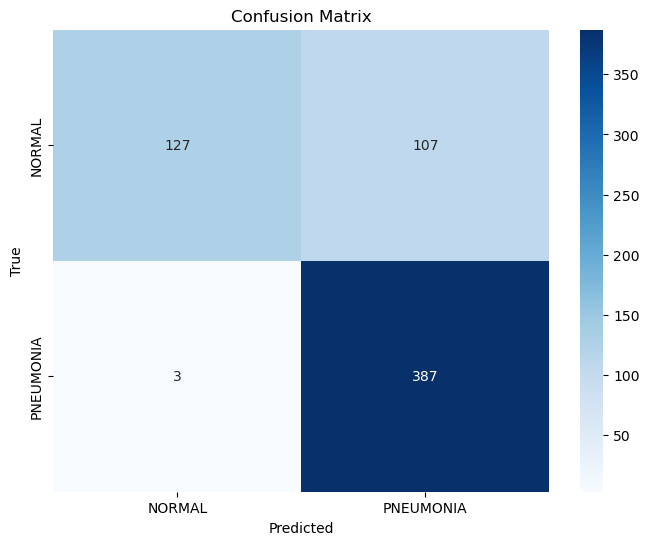

In [145]:
import seaborn as sns

# Confusion Matrix
conf_matrix1 = confusion_matrix(true_labels1, predicted_labels1)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix1, 
            annot=True, 
            fmt='d',
            cmap='Blues', 
            xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys()
           )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<span style = "font-size:18px">127 True Negatives (TN): 127 samples were correctly predicted as NORMAL.

<span style = "font-size:18px">107 False Positives (FP): 107 samples were incorrectly predicted as PNEUMONIA, but they are actually NORMAL.

<span style = "font-size:18px">3 False Negatives (FN): 3 samples were incorrectly predicted as NORMAL, but they are actually PNEUMONIA.

<span style = "font-size:18px">387 True Positives (TP): 387 samples were correctly predicted as PNEUMONIA.

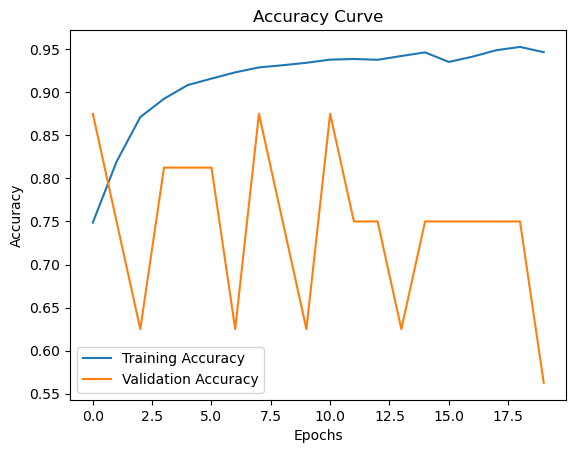

In [150]:
# Extract training and validation accuracy change over epochs 
plt.plot(result_1.history['accuracy'], label='Training Accuracy')
plt.plot(result_1.history['val_accuracy'], label='Validation Accuracy')

# Labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

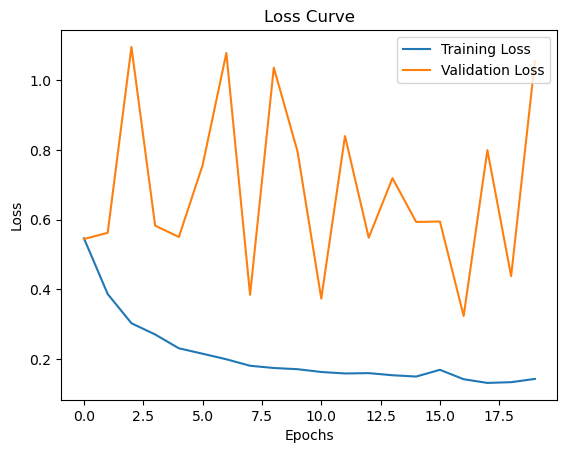

In [153]:
# Extract training and validation loss change over epochs
plt.plot(result_1.history['loss'], label='Training Loss')
plt.plot(result_1.history['val_loss'], label='Validation Loss')

# Labels
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [156]:
# save the model_1
model_1.save('model_1.keras')

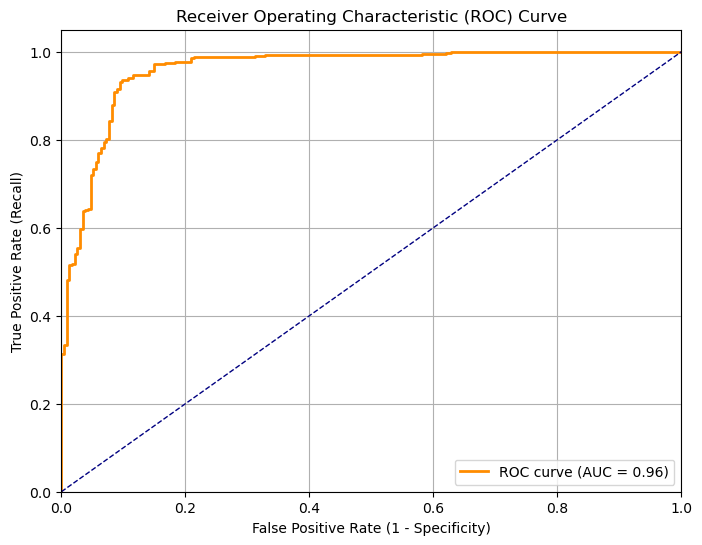

In [20]:
from tensorflow.keras.models import load_model

# Load the model from file
model_1 = load_model("model_1.keras")

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(true_labels1, predictions1)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

<h2>Explainable AI (XAI) technique</h2>

<span style = "font-size:18px">Grad-CAM (Gradient-weighted Class Activation Mapping) is a visualization technique that highlights the important regions in an input image that a convolutional neural network focuses on when making a prediction, using the gradients of the target class flowing into the final convolutional layer

In [118]:
import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.scores import CategoricalScore

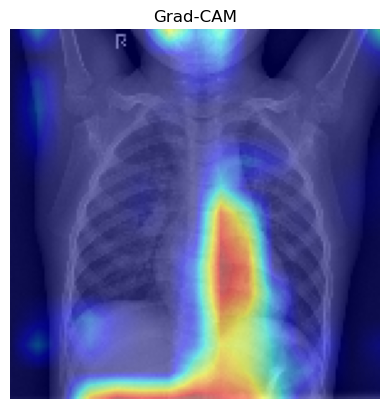

In [61]:
#load the model
from tensorflow.keras.models import load_model
model_1 = load_model("model_1.keras")

# create a model that contains all the weights until the last Conv2D layer
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

# score for the output
score = lambda output: output

# Initialize Gradcam model
gradcam = Gradcam(model_1,
                  model_modifier=model_modifier)

# Resize + Rescale image
img = cv2.resize(img2, img_size)
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Calculate heatmap
cam = gradcam(score, img, penultimate_layer=-4)  # Choose the last Conv2D layer

# Visualize
heatmap = cam[0]
plt.imshow(img[0])
plt.imshow(heatmap, cmap='jet', alpha=0.5)  # heatmap on the image
plt.title("Grad-CAM")
plt.axis('off')
plt.show()

<span style = "font-size:18px"><h2>Model 2</h2>

<span style = "font-size:18px">The model begins with an input layer accepting images of size 150x150 with 3 color channels (RGB), followed by a convolutional layer with 64 filters and a max-pooling layer to reduce spatial dimensions. A key component of this architecture is a custom residual block, inspired by ResNet, which includes two convolutional layers with batch normalization (a technique used to improve the training of deep neural networks by making them faster, more stable, and less sensitive to initialization) and a skip connection that helps retain input features and facilitates better gradient flow during training. After the residual block, the network includes additional convolutional layers with increasing filter sizes (128 and 256), each followed by max-pooling for progressive feature extraction and dimensionality reduction. The output is flattened and passed through a dense layer with 256 neurons and a dropout layer to prevent overfitting. Finally, a sigmoid-activated output neuron performs the binary classification. The model is compiled with binary cross-entropy loss, the Adam optimizer, and accuracy as a metric, making it suitable for tasks like distinguishing between two categories of images.

In [17]:
from tensorflow.keras.layers import ReLU, Add
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [227]:
# Residual Block function
def residual_block(x, filters):
    # First convolution in the residual block
    shortcut = x  # Store the input for the skip connection
    
    # Conv2D + BatchNormalization + ReLU
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    # Second convolution in the residual block
    # Conv2D + BatchNormalization + Add + ReLU
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    
    # A shortcut connection that adds the input tensor directly to the output of the 
    # second batch-normalized Conv2D layer using Add()
    x = Add()([x, shortcut])
    x = ReLU()(x)
    
    return x

# Input layer
input_layer = Input(shape=(150, 150, 3))  

# Conv2D layer followed by MaxPooling2D
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
x = MaxPool2D(pool_size=(2, 2))(x)

# Residual Block with 64 filters
x = residual_block(x, filters=64)

# Conv2D layer with 128 filters followed by MaxPooling2D
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Conv2D layer with 256 filters followed by MaxPooling2D
x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Flatten and Fully Connected layers
x = Flatten()(x) # Convert from 3D tensor to 1D
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x) # # Drops 50% of neurons randomly during training
output_layer = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the model using the functional API
model_2 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model_2.compile(loss='binary_crossentropy', 
                optimizer=Adam(learning_rate=0.0001), 
                metrics=['accuracy'])

# Model summary
model_2.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 150, 150,  │      1,792 │ input_layer_9[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_20    │ (None, 75, 75,    │          0 │ conv2d_59[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 75, 75,    │     36,928 │ max_pooling2d_20… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 75, 75,    │        256 │ conv2d_60[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_35 (ReLU)     │ (None, 75, 75,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 75, 75,    │     36,928 │ re_lu_35[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 75, 75,    │        256 │ conv2d_61[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_15 (Add)        │ (None, 75, 75,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d_20… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_36 (ReLU)     │ (None, 75, 75,    │          0 │ add_15[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 75, 75,    │     73,856 │ re_lu_36[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_21    │ (None, 37, 37,    │          0 │ conv2d_62[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 37, 37,    │    295,168 │ max_pooling2d_21… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_22    │ (None, 18, 18,    │          0 │ conv2d_63[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 82944)     │          0 │ max_pooling2d_22… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 256)       │ 21,233,920 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 256)       │          0 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │        257 │ dropout_7[0][0] 

 Total params: 21,679,361 (82.70 MB)

 Trainable params: 21,679,105 (82.70 MB)

 Non-trainable params: 256 (1.00 KB)

<span style = "font-size:18px">**EarlyStopping callback** is a training optimization tool that helps prevent overfitting and saves training time by automatically stopping training when the model stops improving

In [229]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor the validation loss
    patience=5,          # Stop after 5 epochs with no improvement
    restore_best_weights=True  # Restore the best weights when stopping
)

# Fit the model
history = model_2.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]  # Add early stopping callback
)

Epoch 1/20


2025-04-09 21:03:28.026300: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.7581 - loss: 0.6898

2025-04-09 21:04:28.844307: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 365ms/step - accuracy: 0.7586 - loss: 0.6880 - val_accuracy: 0.5000 - val_loss: 1.3641
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 389ms/step - accuracy: 0.9040 - loss: 0.2301 - val_accuracy: 0.5000 - val_loss: 1.9427
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 420ms/step - accuracy: 0.9224 - loss: 0.2101 - val_accuracy: 0.6875 - val_loss: 0.5224
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 426ms/step - accuracy: 0.9341 - loss: 0.1718 - val_accuracy: 0.5625 - val_loss: 1.7680
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 431ms/step - accuracy: 0.9413 - loss: 0.1628 - val_accuracy: 0.5625 - val_loss: 0.7814
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 431ms/step - accuracy: 0.9444 - loss: 0.1485 - val_accuracy: 0.6875 - val_loss: 0.5959
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 436ms/step - accuracy: 0.9495 - loss: 0.1446 - val_accuracy: 0.5000 - val_loss: 1.2061
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 438ms/step - accuracy: 0.9451 - loss: 0.1456 - val

<h2>Evaluation of the model</h2>

In [241]:
test_loss2, test_accuracy2 = model_2.evaluate(test_generator)
print(f"Test Loss: {test_loss2}")
print(f"Test Accuracy: {test_accuracy2}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.8681 - loss: 0.3736
Test Loss: 0.32937225699424744
Test Accuracy: 0.8717948794364929


In [243]:
# Get predictions on the test set
predictions2 = model_2.predict(test_generator, steps=len(test_generator), verbose=1)

# Since the model uses sigmoid activation for binary classification, 
# we need to threshold the predictions to get binary labels (0 or 1).
predicted_labels2 = (predictions2 > 0.5).astype("int32")

# Get true labels from the test_generator
true_labels2 = test_generator.classes

# Print classification report
print(classification_report(true_labels2, predicted_labels2))

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       234
           1       0.90      0.90      0.90       390

    accuracy                           0.87       624
   macro avg       0.86      0.86      0.86       624
weighted avg       0.87      0.87      0.87       624



<span style = "font-size:18px;color:red;">Class 0 (No Pneumonia) — 234 samples:</span>

<span style = "font-size:18px">* **Precision:** 0.83 → When the model predicts a patient is healthy, it's correct 83% of the time.

<span style = "font-size:18px">* **Recall:** 0.82 → It correctly identifies 82% of all actual healthy patients.

<span style = "font-size:18px">* **F1-Score:** 0.83 → Indicates a balanced performance between precision and recall.

<span style = "font-size:18px;color:red;">Class 1 (Pneumonia) — 390 samples:</span>

<span style = "font-size:18px">* **Precision:** 0.90 → 90% of the predicted pneumonia cases are truly pneumonia.

<span style = "font-size:18px">* **Recall:** 0.90 → The model successfully detects 90% of all real pneumonia cases.

<span style = "font-size:18px">* **F1-Score:** 0.90 → Strong and reliable performance for diagnosing pneumonia.

- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -


<span style = "font-size:18px">* **Accuracy:** 87% → The model correctly classified 87% of all patients.

<span style = "font-size:18px">* **Macro Avg F1-Score:** 0.86 → Balanced performance across both classes.

<span style = "font-size:18px">* **Weighted Avg F1-Score:** 0.87 → High overall effectiveness, slightly favoring the more common class (pneumonia).

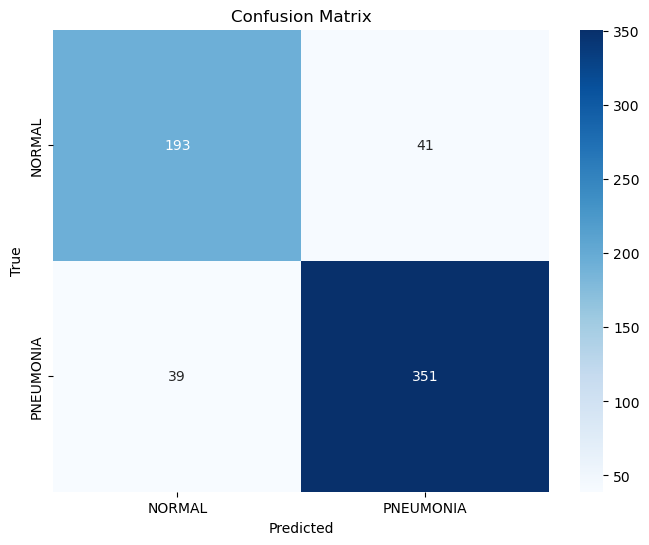

In [245]:
# Confusion Matrix
conf_matrix2 = confusion_matrix(true_labels2, predicted_labels2)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix2, 
            annot=True, 
            fmt='d',
            cmap='Blues', 
            xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys()
           )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<span style = "font-size:18px">193 True Negatives (TN): 193 samples were correctly predicted as NORMAL.

<span style = "font-size:18px">41 False Positives (FP): 41 samples were incorrectly predicted as PNEUMONIA, but they are actually NORMAL.

<span style = "font-size:18px">39 False Negatives (FN): 39 samples were incorrectly predicted as NORMAL, but they are actually PNEUMONIA.

<span style = "font-size:18px">351 True Positives (TP): 351 samples were correctly predicted as PNEUMONIA.

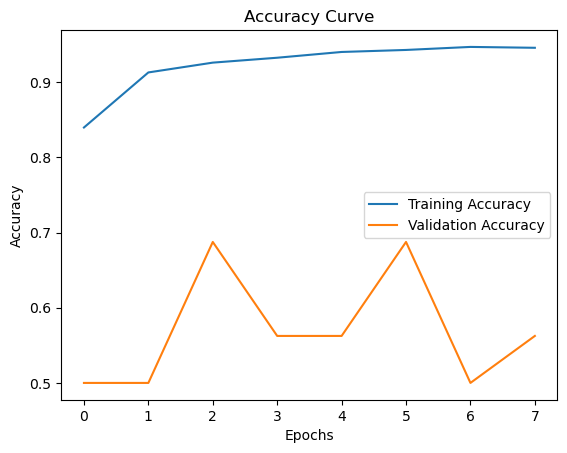

In [249]:
# Extract training and validation accuracy change over epochs 
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

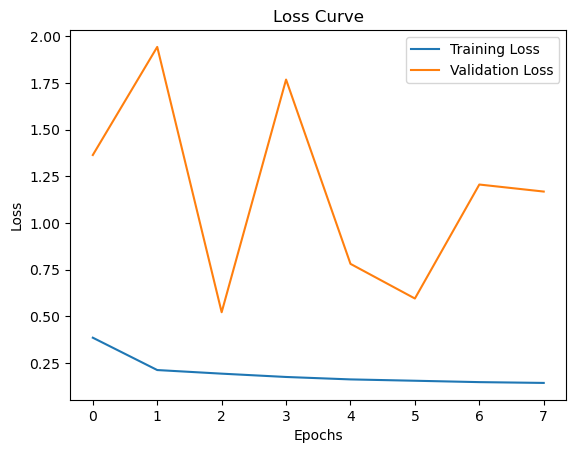

In [251]:
# Extract training and validation loss change over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Labels
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [253]:
# save model_2
model_2.save('model_2.keras')

In [253]:
# save model_2
model_2.save('model_2.keras')

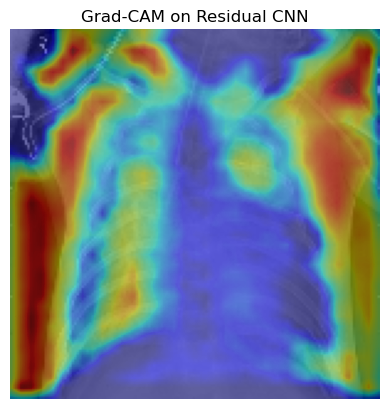

In [66]:
#load the model
from tensorflow.keras.models import load_model
model_2 = load_model("model_2.keras")

img_path = 'chest_xray/test/PNEUMONIA/person1_virus_6.jpeg'  
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (150, 150))
img = img / 255.0
img = np.expand_dims(img, axis=0)


def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

score = lambda output: output[:, 0]  # binary classification output

gradcam = Gradcam(model_2, model_modifier=model_modifier)

# last Conv2D layer :
    # conv2d (64 filters)
    
    # 2 Conv2D inside the residual_block
    
    # conv2d (128 filters)
    
    # conv2d (256 filters) --> 5th layer

cam = gradcam(score, img, penultimate_layer=-5)

# Visualize
heatmap = cam[0]
plt.imshow(img[0])
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.title("Grad-CAM on Residual CNN")
plt.axis('off')
plt.show()

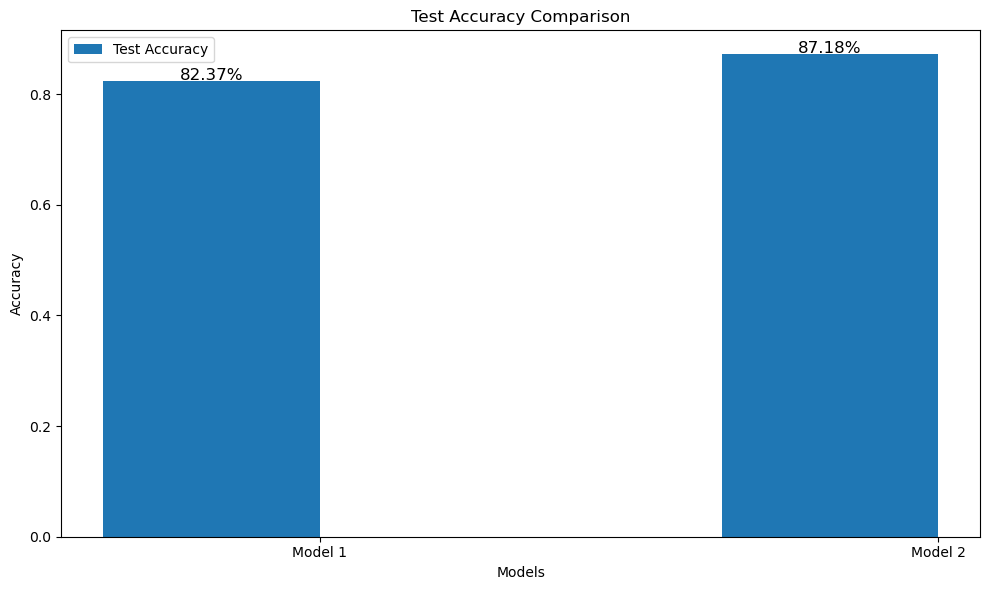

Model 1 - Test Accuracy: 82.37%
Model 2 - Test Accuracy: 87.18%


In [284]:
# Plot the model's test accuracies

test_accuracy = [test_accuracy1, test_accuracy2]


# Create bar plot
bar_width = 0.35
index = np.arange(2)

fig, ax = plt.subplots(figsize=(10, 6))

bar = ax.bar(index, test_accuracy, bar_width, label='Test Accuracy')


# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Test Accuracy Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Model 1', 'Model 2'])
ax.legend()

# Add percentage labels on top of each bar
for i, rect in enumerate(bar):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        height + 0.024,
        f'{height * 100:.2f}%',
        ha='center',
        va='top',
        fontsize=12
    )

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()

# Optionally print the final accuracies
print(f"Model 1 - Test Accuracy: {test_accuracy1 * 100:.2f}%")
print(f"Model 2 - Test Accuracy: {test_accuracy2 * 100:.2f}%")


<h2>Comparison</h2>

<span style = "font-size:18px">* **Model 1:** has a higher recall for pneumonia (0.99), meaning it detects nearly all pneumonia cases. However, it struggles with healthy patients, showing a low recall of 0.54, and its F1-score for Class 0 is weaker.

<span style = "font-size:18px">* **Model 2:** shows more balanced performance, with a precision and recall of 0.83 and 0.82 for healthy patients, and 0.90 for both precision and recall for pneumonia. This results in a better overall F1-score (0.83 vs 0.70 for Model 1 for healthy patients) and a higher accuracy (87% vs 82%).

<span style = "font-size:18px">While Model 2 has a higher accuracy and balanced performance, it suffers from more false negatives (39) for pneumonia compared to Model 1's 3 false negatives. This indicates that Model 1 is better at identifying pneumonia cases, but Model 2 is overall more stable with fewer false positives and a more balanced outcome across both classes.

<span style = "font-size:18px">In summary, <u>Model 1 is more sensitive in detecting pneumonia but lacks in detecting healthy cases, while Model 2 is more balanced but has more false negatives for pneumonia. </u>

<span style = "font-size:18px">ResNet-type model

In [24]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam

In [68]:
# Input shape must match what ResNet50 expects
input_shape = (150, 150, 3) 

# Load base ResNet50 with pretrained ImageNet weights, without top classifier
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze base model to use pretrained features 
base_model.trainable = False  

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Final model
model_3 = Model(inputs=base_model.input, outputs=predictions)

# Compile
model_3.compile(optimizer=Adam(learning_rate=0.0001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_3.summary()


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_accuracy',   
    patience=5,               # stop after 5 epochs with no improvement
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy', 
    factor=0.5,               # reduce LR by half
    patience=3,               # wait 3 epochs before reducing
    min_lr=1e-7,              # do not go below this learning rate
    verbose=1
)

In [70]:
import os

val_normal = len(os.listdir('./chest_xray/val/NORMAL'))
val_pneumonia = len(os.listdir('./chest_xray/val/PNEUMONIA'))

print(f"Validation NORMAL images: {val_normal}")
print(f"Validation PNEUMONIA images: {val_pneumonia}")

Validation NORMAL images: 8
Validation PNEUMONIA images: 8


<span style = "font-size:18px;">The number of images in validation set is very low so we will reserve 20% of the data for validation

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directories with data
train_dir = "./chest_xray/train/"   # Contains ALL images for both training and validation
test_dir = "./chest_xray/test/"     # Used only for final model evaluation

# Image and batch configuration
img_size = (150, 150)   # Resize all images to 150x150 pixels
batch_size = 32         # Number of images per batch

# ------------------- TRAINING & VALIDATION FROM THE SAME FOLDER -------------------

# This generator applies image augmentation for the training set and 
# also splits off 20% of the data to use as a validation set
train_datagen2 = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values to [0, 1]
    rotation_range=30,        # Randomly rotate images up to 30 degrees
    width_shift_range=0.1,    # Randomly shift images horizontally by 10%
    height_shift_range=0.1,   # Randomly shift images vertically by 10%
    shear_range=0.2,          # Apply shearing transformations
    zoom_range=0.2,           # Randomly zoom in by up to 20%
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest',      # Fill in new pixels using the nearest pixel values
    validation_split=0.2      # Reserve 20% of the data for validation
)

# Training generator: uses 80% of the images in train_dir
train_generator2 = train_datagen2.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',      # For binary classification (NORMAL vs. PNEUMONIA)
    subset='training',        # This specifies that it's for the training subset
    shuffle=True              # Shuffle data for better training
)

# Validation generator: uses 20% of the images in train_dir
val_generator2 = train_datagen2.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',      # This specifies that it's for the validation subset
    shuffle=False             # No need to shuffle validation data
)

# ------------------- TEST GENERATOR -------------------

# The test set should not have augmentation, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False             # Keep the test order fixed for evaluation
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [74]:
history_3 = model_3.fit(
    train_generator2,
    validation_data=val_generator2,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


2025-05-13 18:22:27.566338: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


131/131 ━━━━━━━━━━━━━━━━━━━━ 50s 352ms/step - accuracy: 0.6599 - loss: 0.6539 - val_accuracy: 0.7430 - val_loss: 0.5638 - learning_rate: 1.0000e-04
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 44s 334ms/step - accuracy: 0.7375 - loss: 0.5808 - val_accuracy: 0.7430 - val_loss: 0.5576 - learning_rate: 1.0000e-04
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 48s 367ms/step - accuracy: 0.7466 - loss: 0.5553 - val_accuracy: 0.7430 - val_loss: 0.5479 - learning_rate: 1.0000e-04
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.7408 - loss: 0.5541
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
131/131 ━━━━━━━━━━━━━━━━━━━━ 49s 374ms/step - accuracy: 0.7409 - loss: 0.5541 - val_accuracy: 0.7430 - val_loss: 0.5416 - learning_rate: 1.0000e-04
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 50s 378ms/step - accuracy: 0.7442 - loss: 0.5441 - val_accuracy: 0.7421 - val_loss: 0.5365 - learning_rate: 5.0000e-05
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 50s 381ms/step - accura

In [94]:
# Unfreeze all layers
model_3.trainable = True

# Fine-tune only last 30 layers
for layer in model_3.layers[:-30]:
     layer.trainable = False

# Re-compile with a smaller LR
from tensorflow.keras.optimizers import Adam
model_3.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [96]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights to handle class imbalance during training.
# This helps the model not be biased toward the majority class.
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator2.classes),
    y=train_generator2.classes
)
# Convert the array of weights to a dictionary format
class_weights = dict(enumerate(class_weights))

history_3_finetune = model_3.fit(
    train_generator2,
    validation_data=val_generator2,
    epochs=10,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights 
)

Epoch 1/10


2025-05-13 19:22:44.047098: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


131/131 ━━━━━━━━━━━━━━━━━━━━ 50s 354ms/step - accuracy: 0.5752 - loss: 0.7116 - val_accuracy: 0.7315 - val_loss: 0.6656 - learning_rate: 1.0000e-05
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 41s 315ms/step - accuracy: 0.5430 - loss: 0.7042 - val_accuracy: 0.7258 - val_loss: 0.6772 - learning_rate: 1.0000e-05
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 45s 343ms/step - accuracy: 0.5480 - loss: 0.6868 - val_accuracy: 0.7076 - val_loss: 0.6776 - learning_rate: 1.0000e-05
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.5198 - loss: 0.7129
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
131/131 ━━━━━━━━━━━━━━━━━━━━ 47s 358ms/step - accuracy: 0.5198 - loss: 0.7128 - val_accuracy: 0.6826 - val_loss: 0.6782 - learning_rate: 1.0000e-05
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 48s 366ms/step - accuracy: 0.5304 - loss: 0.6987 - val_accuracy: 0.6491 - val_loss: 0.6806 - learning_rate: 5.0000e-06
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 48s 367ms/step - accura

In [98]:
test_loss3, test_accuracy3 = model_3.evaluate(test_generator)
print(f"Test Loss: {test_loss3}")
print(f"Test Accuracy: {test_accuracy3}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 245ms/step - accuracy: 0.5617 - loss: 0.6861
Test Loss: 0.6718241572380066
Test Accuracy: 0.7339743375778198


In [104]:
# Get predictions on the test set
predictions3 = model_3.predict(test_generator, steps=len(test_generator), verbose=1)

# Since the model uses sigmoid activation for binary classification, 
# we need to threshold the predictions to get binary labels (0 or 1).
predicted_labels3 = (predictions3 > 0.5).astype("int32")

# Get true labels from the test_generator
true_labels3 = test_generator.classes

# Print classification report
print(classification_report(true_labels3, predicted_labels3))

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step
              precision    recall  f1-score   support

           0       0.75      0.44      0.55       234
           1       0.73      0.91      0.81       390

    accuracy                           0.73       624
   macro avg       0.74      0.68      0.68       624
weighted avg       0.74      0.73      0.71       624



<span style = "font-size:18px;color:red;">Class 0 — NORMAL (No Pneumonia)

<span style = "font-size:18px;">Support: 234 samples

<span style = "font-size:18px;">Precision: 0.75 → When the model predicts a patient is normal, it's correct 77% of the time.

<span style = "font-size:18px;">Recall: 0.44 → The model correctly identifies only 47% of truly healthy patients.

<span style = "font-size:18px;">F1-Score: 0.55 → This indicates an unbalanced performance, leaning toward many false positives (normal misclassified as pneumonia).

<span style = "font-size:18px;color:red;">Class 1 — PNEUMONIA
<span style = "font-size:18px;">Support: 390 samples

<span style = "font-size:18px;">Precision: 0.73 → When the model predicts pneumonia, it’s correct 74% of the time.

<span style = "font-size:18px;">Recall: 0.91 → It correctly detects 92% of all real pneumonia cases — very high sensitivity.

<span style = "font-size:18px;">F1-Score: 0.81 → A strong and reliable performance in diagnosing pneumonia.

<span style = "font-size:18px;color:red;">Overall Performance
<span style = "font-size:18px;">Accuracy: 73% → The model correctly classified 3 out of 4 patients overall.

<span style = "font-size:18px;">Macro Average F1-Score: 0.68 → Average F1 across both classes, treating each class equally. Indicates imbalanced performance.

<span style = "font-size:18px;">Weighted Average F1-Score: 0.71 → Average F1 weighted by support (more samples in class 1). Suggests overall solid performance, but skewed toward pneumonia.

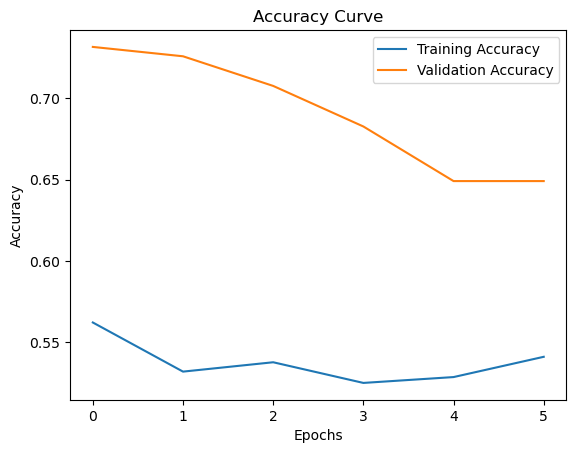

In [106]:
# Extract training and validation accuracy change over epochs 
plt.plot(history_3_finetune.history['accuracy'], label='Training Accuracy')
plt.plot(history_3_finetune.history['val_accuracy'], label='Validation Accuracy')

# Labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

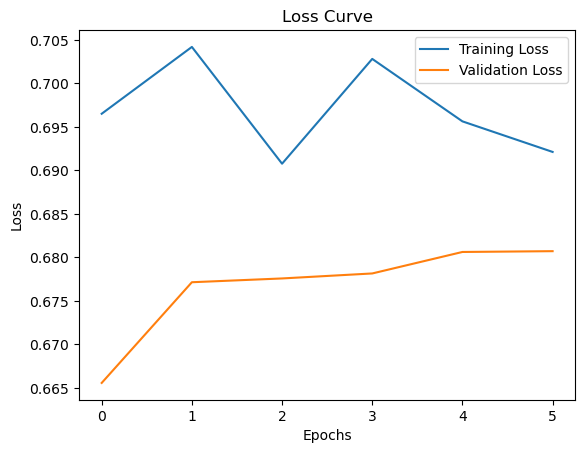

In [108]:
# Extract training and validation loss change over epochs
plt.plot(history_3_finetune.history['loss'], label='Training Loss')
plt.plot(history_3_finetune.history['val_loss'], label='Validation Loss')

# Labels
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

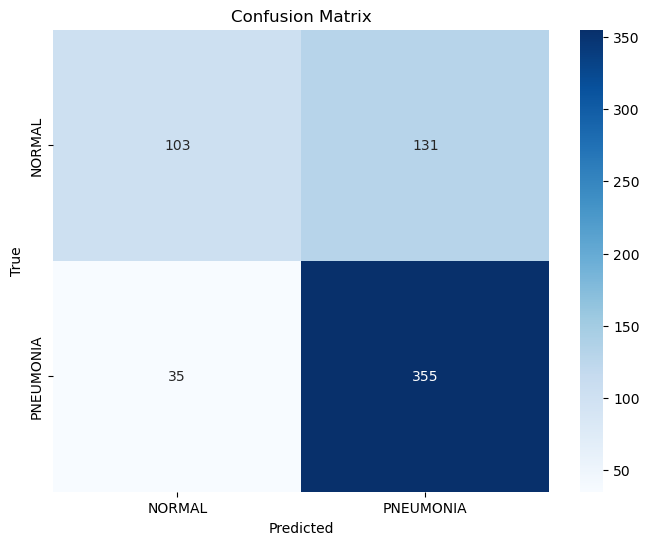

In [110]:
import seaborn as sns

# Confusion Matrix
conf_matrix3 = confusion_matrix(true_labels3, predicted_labels3)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix3, 
            annot=True, 
            fmt='d',
            cmap='Blues', 
            xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys()
           )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<span style = "font-size:18px;">103 True Negatives (TN):
<span style = "font-size:18px;">→ 103 samples were correctly predicted as NORMAL.

<span style = "font-size:18px;">131 False Positives (FP):
<span style = "font-size:18px;">→ 131 samples were incorrectly predicted as PNEUMONIA, but they are actually NORMAL.
(These are healthy patients wrongly flagged as sick.)

<span style = "font-size:18px;">35 False Negatives (FN):
<span style = "font-size:18px;">→ 35 samples were incorrectly predicted as NORMAL, but they are actually PNEUMONIA.
(These are sick patients the model failed to detect.)

<span style = "font-size:18px;">355 True Positives (TP):
<span style = "font-size:18px;">→ 355 samples were correctly predicted as PNEUMONIA.

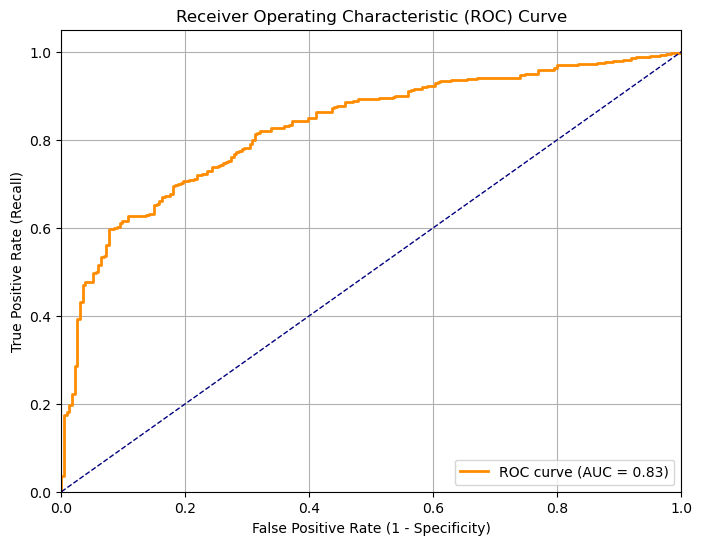

In [112]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(true_labels3, predictions3)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [114]:
# save the model_1
model_3.save('model_3.keras')

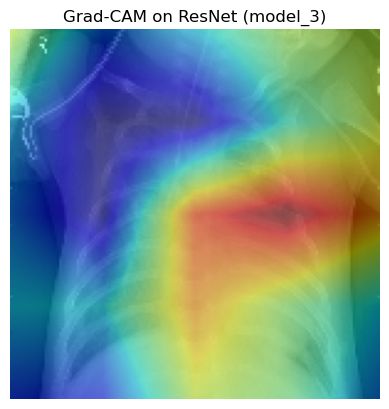

In [120]:
# Load the model
from tensorflow.keras.models import load_model
model_3 = load_model("model_3.keras")

# Load and preprocess an image
img_path = 'chest_xray/test/PNEUMONIA/person1_virus_6.jpeg'  
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (150, 150))
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Set final activation to linear for Grad-CAM
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

# Score function for binary classification (sigmoid output)
score = lambda output: output[:, 0]

# Create GradCAM object
gradcam = Gradcam(model_3, model_modifier=model_modifier)

# Last Conv2D layer:
#   ResNet has many blocks, but the last conv block before global average pooling is:
#   → 'conv5_block3_out' (shape: (None, 5, 5, 2048))
cam = gradcam(score, img, penultimate_layer='conv5_block3_out')

# Visualize
heatmap = cam[0]
plt.imshow(img[0])
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.title("Grad-CAM on ResNet (model_3)")
plt.axis('off')
plt.show()
